# Yelp Review Dataset Analysis



## Spark Setup

In [1]:
%info

ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
6,application_1619310664737_0007,pyspark,idle,Link,Link,


In [2]:
sc.list_packages()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
7,application_1619310664737_0008,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.1
boto                       2.49.0
jmespath                   0.9.4
lxml                       4.4.2
mysqlclient                1.4.6
nltk                       3.4.5
nose                       1.3.4
numpy                      1.14.5
pip                        21.1
py-dateutil                2.2
python36-sagemaker-pyspark 1.2.6
pytz                       2019.3
PyYAML                     3.11
setuptools                 56.0.0
six                        1.13.0
soupsieve                  1.9.5
wheel                      0.36.2
windmill                   1.6

In [3]:
sc.install_pypi_package("pandas==1.0.3")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)

In [4]:
sc.install_pypi_package('matplotlib==3.2.1')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.3.1-cp36-cp36m-manylinux1_x86_64.whl (1.1 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)

In [5]:
sc.install_pypi_package('seaborn==0.11.1')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)
  Using cached scipy-1.5.4-cp36-cp36m-manylinux1_x86_64.whl (25.9 MB)
  Using cached numpy-1.19.5-cp36-cp36m-manylinux2010_x86_64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.14.5
    Not uninstalling numpy at /usr/local/lib64/python3.6/site-packages, outside environment /tmp/1619392843364-0
    Can't uninstall 'numpy'. No files were found to uninstall.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
python36-sagemaker-pyspark 1.2.6 requires pyspark==2.3.2, which is not installed.

In [6]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.1
boto                       2.49.0
cycler                     0.10.0
jmespath                   0.9.4
kiwisolver                 1.3.1
lxml                       4.4.2
matplotlib                 3.2.1
mysqlclient                1.4.6
nltk                       3.4.5
nose                       1.3.4
numpy                      1.19.5
pandas                     1.0.3
pip                        21.1
py-dateutil                2.2
pyparsing                  2.4.7
python-dateutil            2.8.1
python36-sagemaker-pyspark 1.2.6
pytz                       2019.3
PyYAML                     3.11
scipy                      1.5.4
seaborn                    0.11.1
setuptools                 56.0.0
six                        1.13.0
soupsieve                  1.9.5
wheel                      0.36.2
windmill                   1.6

## Imports

In [7]:
from pyspark.sql.functions import explode, split

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import countDistinct
from pyspark.sql.functions import col, mean

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Read

In [8]:
business = spark.read.json('s3://sta9760yelp/yelp_academic_dataset_business.json')
review = spark.read.json('s3://sta9760yelp/yelp_academic_dataset_review.json')
user = spark.read.json('s3://sta9760yelp/yelp_academic_dataset_user.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Overview of Data

In [9]:
business.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

In [10]:
business.select('business_id','name','city','state','stars','categories').show(5)
business.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----------+-----+-----+--------------------+
|         business_id|                name|       city|state|stars|          categories|
+--------------------+--------------------+-----------+-----+-----+--------------------+
|6iYb2HFDywm3zjuRg...| Oskar Blues Taproom|    Boulder|   CO|  4.0|Gastropubs, Food,...|
|tCbdrRPZA0oiIYSmH...|Flying Elephants ...|   Portland|   OR|  4.0|Salad, Soup, Sand...|
|bvN78flM8NLprQ1a1...|      The Reclaimory|   Portland|   OR|  4.5|Antiques, Fashion...|
|oaepsyvc0J17qwi8c...|         Great Clips|Orange City|   FL|  3.0|Beauty & Spas, Ha...|
|PE9uqAjdw0E4-8mjG...|   Crossfit Terminus|    Atlanta|   GA|  4.0|Gyms, Active Life...|
+--------------------+--------------------+-----------+-----+-----+--------------------+
only showing top 5 rows

160585

# Analyzing Categories

The categories column shows a list of categories the business falls under. We need to break out these categories to further analyze.

### original

| business_id | categories          
| :- |:------------- 
|RestaurantA| Spicy, Soup, Healthy  

### new

| business_id | categories          
| :- |:------------- 
|RestaurantA| Spicy
|RestaurantA| Soup
|RestaurantA| Healthy

In [11]:
#creating new business df with categories broken out

business_cat = business.select('business_id','categories')
business_cat_explode =business_cat.withColumn('categories',explode(split('categories',",")))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
business_cat_explode.show(15)
business_cat_explode.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|         business_id|          categories|
+--------------------+--------------------+
|6iYb2HFDywm3zjuRg...|          Gastropubs|
|6iYb2HFDywm3zjuRg...|                Food|
|6iYb2HFDywm3zjuRg...|        Beer Gardens|
|6iYb2HFDywm3zjuRg...|         Restaurants|
|6iYb2HFDywm3zjuRg...|                Bars|
|6iYb2HFDywm3zjuRg...| American (Tradit...|
|6iYb2HFDywm3zjuRg...|            Beer Bar|
|6iYb2HFDywm3zjuRg...|           Nightlife|
|6iYb2HFDywm3zjuRg...|           Breweries|
|tCbdrRPZA0oiIYSmH...|               Salad|
|tCbdrRPZA0oiIYSmH...|                Soup|
|tCbdrRPZA0oiIYSmH...|          Sandwiches|
|tCbdrRPZA0oiIYSmH...|               Delis|
|tCbdrRPZA0oiIYSmH...|         Restaurants|
|tCbdrRPZA0oiIYSmH...|               Cafes|
+--------------------+--------------------+
only showing top 15 rows

708968

#### the number of rows increased as expected after breaking out categories

## Total Unique Categories

In [13]:
business_cat_explode.select(countDistinct('categories')).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------------+
|count(DISTINCT categories)|
+--------------------------+
|                      2487|
+--------------------------+

## Top Categories By Business

Purpose is to find the most popular business categories. This will be done by grouping and finding the count of each category.

In [14]:
business_group = business_cat_explode.groupby('categories')
business_cat_bar = business_group.count().orderBy('count',ascending=False)
business_cat_bar.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|          categories|count|
+--------------------+-----+
|         Restaurants|36340|
|                Food|22094|
|            Shopping|20056|
|         Restaurants|14423|
|       Home Services|12001|
|       Beauty & Spas|11633|
|    Health & Medical|11390|
|           Nightlife| 9808|
|      Local Services| 9299|
|                Bars| 8914|
| Event Planning &...| 7617|
|                Food| 7375|
|         Active Life| 7039|
|          Automotive| 6785|
|            Shopping| 6149|
|        Coffee & Tea| 5735|
|          Sandwiches| 5697|
| American (Tradit...| 5235|
|             Fashion| 5231|
|       Beauty & Spas| 4941|
+--------------------+-----+
only showing top 20 rows

In [15]:
bcdf = business_cat_bar.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

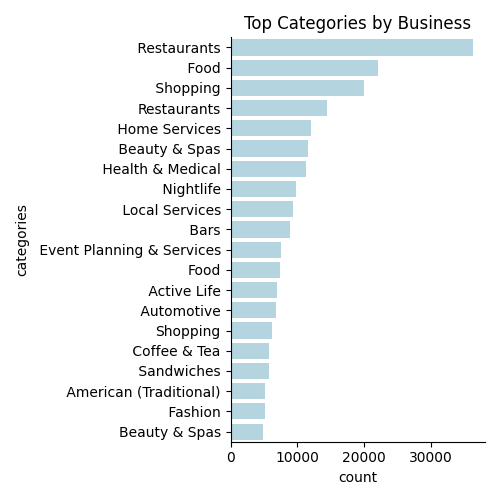

In [16]:
sns.catplot(y='categories',x='count', data=bcdf[0:20], kind='bar',color='lightblue')
plt.title('Top Categories by Business')
plt.tight_layout()
plt.show()
%matplot plt

# Yelp User Reviews Analysis

In [17]:
review.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

In [18]:
review.select('business_id','stars').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|buF9druCkbuXLX526...|  4.0|
|RA4V8pr014UyUbDvI...|  4.0|
|_sS2LBIGNT5NQb6PD...|  5.0|
|0AzLzHfOJgL7ROwhd...|  2.0|
|8zehGz9jnxPqXtOc7...|  4.0|
+--------------------+-----+
only showing top 5 rows

In [19]:
#calculate user review on business grouping by business

rev_avg = review.select('business_id','stars') \
    .withColumn('stars', col('stars').cast('float')) \
    .groupBy('business_id') \
    .agg(mean('stars').alias('avg_stars'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
rev_avg.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|         avg_stars|
+--------------------+------------------+
|OXcBg_6vgi-J3nZzI...| 3.852272727272727|
|bxy3khT-2R66tcdKj...| 3.986344537815126|
|f3teByaeIKPTYetAa...| 4.329608938547486|
|3KqpiLDAjeeMmZeU-...|2.5555555555555554|
|_hkHeU2cBH9fzthId...| 3.168195718654434|
+--------------------+------------------+
only showing top 5 rows

In [21]:
#joining business and rev_avg df to compare average user rating to business rating

bus_avg_star = business.join(rev_avg, business.business_id == rev_avg.business_id)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [22]:
bus_avg_star.select('avg_stars', 'stars', 'name', 'city', 'state').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-----+--------------------+------------+-----+
|         avg_stars|stars|                name|        city|state|
+------------------+-----+--------------------+------------+-----+
|1.9090909090909092|  2.0|             Safeway|   Vancouver|   WA|
| 2.966292134831461|  3.0|Cracker Barrel Ol...|Pickerington|   OH|
|  2.81981981981982|  3.0| Peaceful Restaurant|   Vancouver|   BC|
|               5.0|  5.0|      ATX Architects|      Austin|   TX|
| 4.524271844660194|  4.5|    Evergreen Eatery|      Boston|   MA|
+------------------+-----+--------------------+------------+-----+
only showing top 5 rows

### Calculating Skew Between Business Rating and Average User Rating on said Business

To calculate skewness between user rating and business rating, I will calculate % difference.

(Average Rating - Business Rating) / Business Rating  
Above formula will find the percent change between average user rating and business rating


In [23]:
skew = bus_avg_star.withColumn('skew', (col('avg_stars')-col('stars')) / col('stars') ) 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
skewdf = skew.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

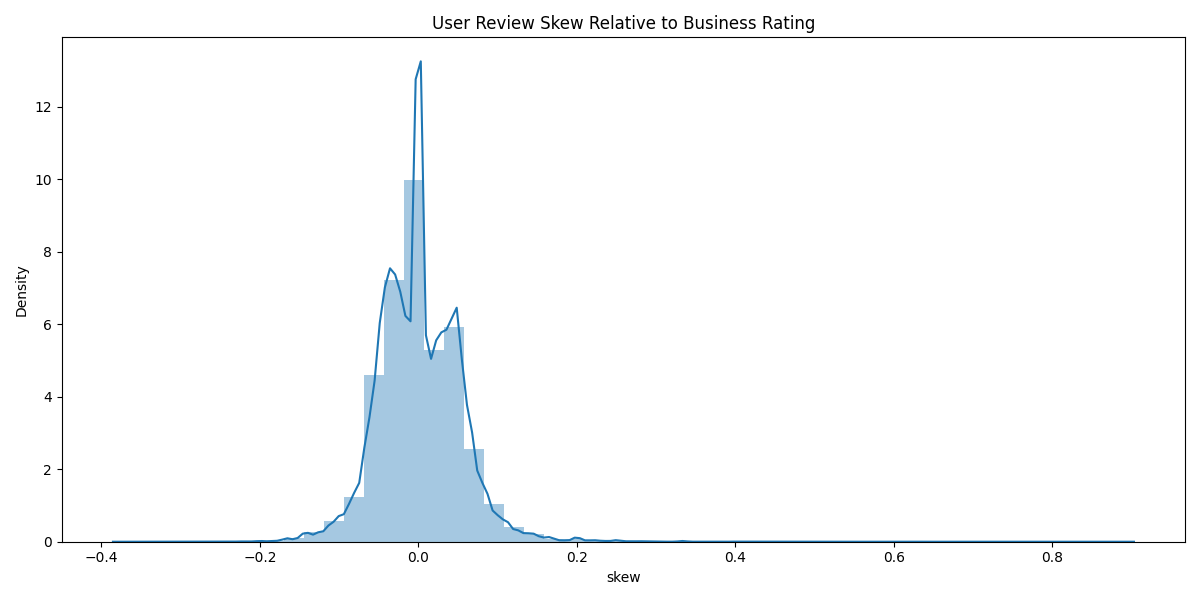

In [25]:
plt.clf()
plt.figure(figsize=(12, 6))
sns.distplot(skewdf['skew'])
plt.title('User Review Skew Relative to Business Rating')
plt.tight_layout()

plt.show()
%matplot plt

The above histogram shows that the average user rating is typically lower than the business rating due to left skew.

### Rating Comparison of Elite vs Normal Users on Same Business

In [26]:
#joining review and user df to classify which review is considered elite members

review_user = review.join(user, review.user_id == user.user_id)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
review_user.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- 

In [28]:
#calculation of elite user average rating on business

norm_avg = review_user.filter(review_user.elite=='').withColumn('stars', col('stars').cast('float')) \
    .groupBy('business_id') \
    .agg(mean('stars').alias('norm_avg'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [29]:
#calculation of normal user average rating on business

elite_avg = review_user.filter(review_user.elite.contains(',')).withColumn('stars', col('stars').cast('float')) \
    .groupBy('business_id') \
    .agg(mean('stars').alias('elite_avg'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [30]:
#joining both df from above to get ready to calculate skewness

avgjoined = norm_avg.join(elite_avg, norm_avg.business_id == elite_avg.business_id)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [31]:
avgjoined.show(3)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+--------------------+------------------+
|         business_id|          norm_avg|         business_id|         elite_avg|
+--------------------+------------------+--------------------+------------------+
|-36nnCT71XE0InJXK...| 1.903225806451613|-36nnCT71XE0InJXK...|               2.0|
|-QOl03c2B22yi_On0...|2.6470588235294117|-QOl03c2B22yi_On0...|               3.4|
|-VVUUPK0ytYjpJ_S7...| 2.814814814814815|-VVUUPK0ytYjpJ_S7...|2.8333333333333335|
+--------------------+------------------+--------------------+------------------+
only showing top 3 rows

In [32]:
#calculating % difference between elite and normal reviews

reviewskew = avgjoined.withColumn('reviewskew', (col('elite_avg')-col('norm_avg')) / col('norm_avg') ) 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [33]:
reviewskewdf = reviewskew.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

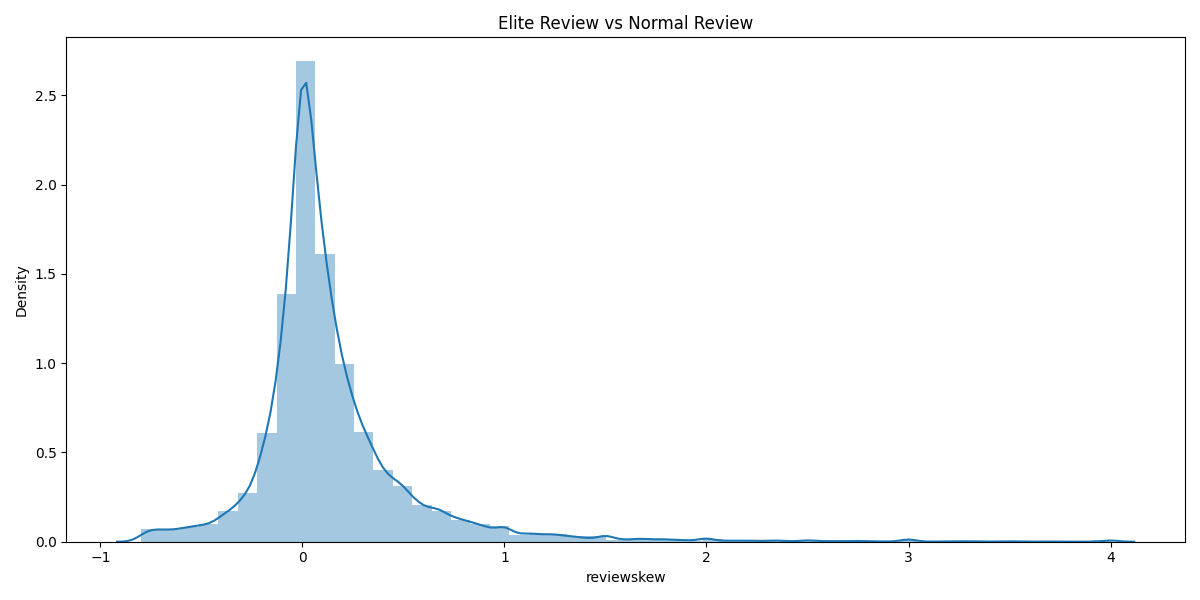

In [34]:
plt.clf()
plt.figure(figsize=(12, 6))
sns.distplot(reviewskewdf['reviewskew'])
plt.title('Elite Review vs Normal Review')
plt.tight_layout()

plt.show()
%matplot plt

Above histogram shows that Elite members typically rate business higher than normal users due to right skew.